In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

597

In [6]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the uRL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}") 
    
    #Add 1 to the record count
    record_count += 1
    
#run an API request fro each of the cities
    try:
        #parse te JSON and retrive data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#Indicate that the Data Loading is complete
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | winslow
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port hueneme
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | kalevala
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | lydenburg
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | merauke
Processing Record 17 of Set 1 | yaroslavl
Processing Record 18 of Set 1 | haines junction
Processing Record 19 of Set 1 | frederico westphalen
Processing Record 20 of Set 1 | kalyazin
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set

Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | villa union
Processing Record 44 of Set 4 | shalinskoye
Processing Record 45 of Set 4 | shakawe
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | tabou
Processing Record 48 of Set 4 | mrirt
City not found. Skipping...
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 50 of Set 4 | sosnovo-ozerskoye
Processing Record 1 of Set 5 | ustupo
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | yumen
Processing Record 7 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 5 | itaituba
Processing Record 9 of Set 5 | akdepe
Processing Record 10 of Set 5 | grand-santi
Process

Processing Record 28 of Set 8 | astoria
Processing Record 29 of Set 8 | dongli
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | mugur-aksy
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | katherine
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | matamoros
Processing Record 36 of Set 8 | benghazi
Processing Record 37 of Set 8 | cintalapa
Processing Record 38 of Set 8 | lesozavodsk
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | timizart
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | sawtell
Processing Record 44 of Set 8 | uniontown
Processing Record 45 of Set 8 | mehamn
Processing Record 46 of Set 8 | karaman
Processing Record 47 of Set 8 | pacific grove
Processing Record 48 of Set 8 | makakilo city
Processing Record 49 of Set 8 | klaksvik
Processing Record 50 of Set 8 | marystown
Processing Record 1

Processing Record 18 of Set 12 | rincon
Processing Record 19 of Set 12 | makinsk
Processing Record 20 of Set 12 | catamarca
Processing Record 21 of Set 12 | tecoanapa
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | bowen
Processing Record 24 of Set 12 | ursulo galvan
Processing Record 25 of Set 12 | swan river
Processing Record 26 of Set 12 | kamloops
Processing Record 27 of Set 12 | paradwip
City not found. Skipping...
Processing Record 28 of Set 12 | isla vista
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | koslan
Processing Record 31 of Set 12 | ardakan
Processing Record 32 of Set 12 | morehead
Processing Record 33 of Set 12 | aguimes
Processing Record 34 of Set 12 | cabungan
Processing Record 35 of Set 12 | aklavik
Processing Record 36 of Set 12 | buqayq
City not found. Skipping...
Processing Record 37 of Set 12 | artyk
City not found. Skipping...
Processing Record 38 of Set 12 | nagamangala
Processing Record 39 of Set 12 | nan

In [10]:
len(city_data)

549

In [11]:
#convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,62.85,94,100,3.27,BR,2021-03-04 03:56:24
1,Iqaluit,63.7506,-68.5145,-2.20,71,90,26.46,CA,2021-03-04 03:56:25
2,Vardo,70.3705,31.1107,21.20,73,40,13.80,NO,2021-03-04 03:56:25
3,Lasa,46.6166,10.7002,37.99,57,39,2.75,IT,2021-03-04 03:56:26
4,Winslow,35.0242,-110.6974,55.40,26,20,28.77,US,2021-03-04 03:56:27
5,Cape Town,-33.9258,18.4232,66.99,88,75,13.80,ZA,2021-03-04 03:56:27
6,Hermanus,-34.4187,19.2345,64.99,94,81,8.99,ZA,2021-03-04 03:56:27
7,Ushuaia,-54.8000,-68.3000,50.00,66,0,5.75,AR,2021-03-04 03:55:01
8,Port Hueneme,34.1478,-119.1951,55.40,62,1,4.61,US,2021-03-04 03:56:28
9,Hobart,-42.8794,147.3294,69.80,26,0,17.27,AU,2021-03-04 03:55:03


In [12]:
#reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-03-04 03:56:24,-24.7911,-50.0119,62.85,94,100,3.27
1,Iqaluit,CA,2021-03-04 03:56:25,63.7506,-68.5145,-2.20,71,90,26.46
2,Vardo,NO,2021-03-04 03:56:25,70.3705,31.1107,21.20,73,40,13.80
3,Lasa,IT,2021-03-04 03:56:26,46.6166,10.7002,37.99,57,39,2.75
4,Winslow,US,2021-03-04 03:56:27,35.0242,-110.6974,55.40,26,20,28.77
5,Cape Town,ZA,2021-03-04 03:56:27,-33.9258,18.4232,66.99,88,75,13.80
6,Hermanus,ZA,2021-03-04 03:56:27,-34.4187,19.2345,64.99,94,81,8.99
7,Ushuaia,AR,2021-03-04 03:55:01,-54.8000,-68.3000,50.00,66,0,5.75
8,Port Hueneme,US,2021-03-04 03:56:28,34.1478,-119.1951,55.40,62,1,4.61
9,Hobart,AU,2021-03-04 03:55:03,-42.8794,147.3294,69.80,26,0,17.27


In [13]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

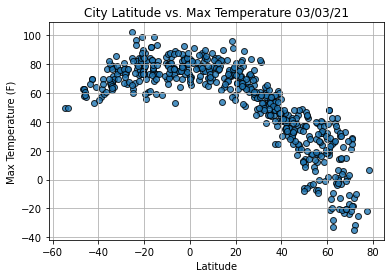

In [15]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

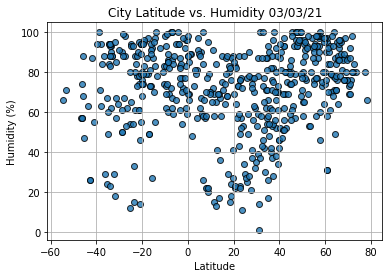

In [16]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

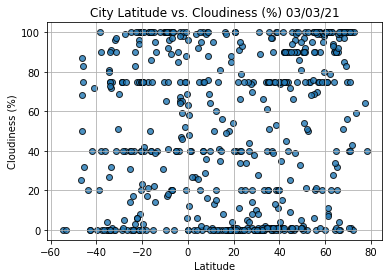

In [17]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

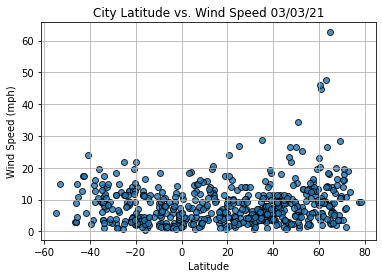

In [18]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

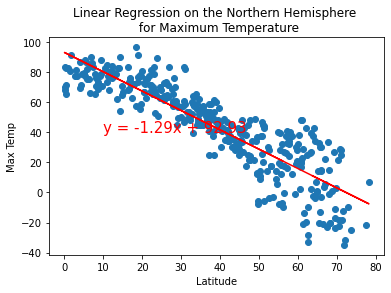

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


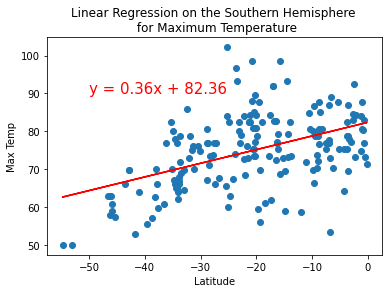

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

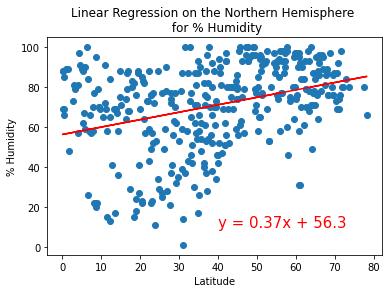

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

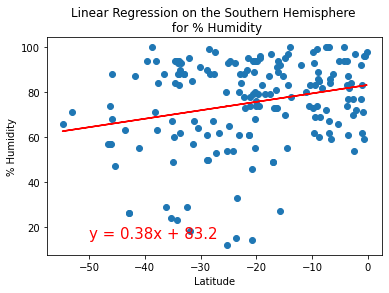

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

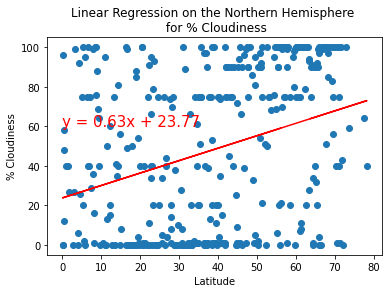

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,60))

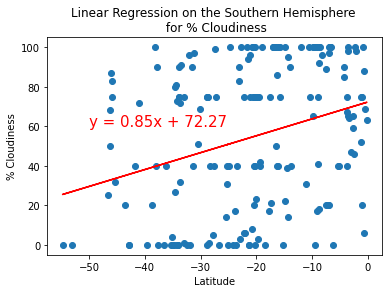

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

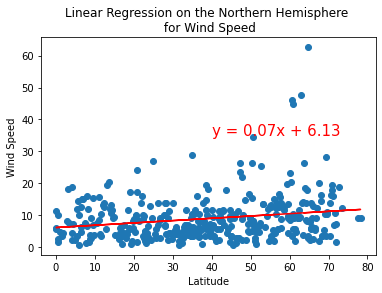

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

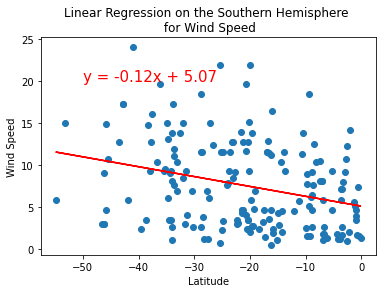

In [57]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))